In [1]:
# добавим необходмимые библиотеки для анализа.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st


## Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data.head())
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


При осмотре таблицы выявлены следующие отклонения, есть пропущеные значенияв столбцах, у столбца "Year_of_Release" не правильный тип данных, нужно будет заменить. Всего 16715 строк. Для удобства анализа, нужно будет названия столбцов заменить на строчные буквы.	

## Шаг 2. Подготовьте данные

In [3]:
# Приведем названия столбцо к нижнему регистру.
data.columns = map(str.lower, data.columns)
data.columns #проерим работу функции.

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [4]:
# преобразуем тип данных столбца 'year_of_release'
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
display(data.head())
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null datetime64[ns]
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.4+ MB


В столбце 'year_of_release' преобразовали тип данных с float64 в datetime64[ns]

In [5]:
print('Посмотрим данные по столбцу "critic_score" ')
print(data['critic_score'].value_counts().head())
print()
print(data['critic_score'].unique())
print('----------------------------------')
print('Посмотрим данные по столбцу "user_score" ')
print(data['user_score'].value_counts().head())
print()
print(data['user_score'].unique())

Посмотрим данные по столбцу "critic_score" 
70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
Name: critic_score, dtype: int64

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]
----------------------------------
Посмотрим данные по столбцу "user_score" 
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
Name: user_score, dtype: int64

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9

In [6]:
# заменим пропущенные значения на нули
data['critic_score'] = data['critic_score'].fillna(0)
data['user_score'] = data['user_score'].fillna(0)

# заменим значение "tbd" на нулевое значение
data.loc[data['user_score'] == 'tbd', 'user_score'] = '0'
print(data['user_score'].value_counts().head()) # проверим замену значение tbd
data['user_score'] = pd.to_numeric(data['user_score'])

# проверим преобразования
data.info()

0      6701
0      2425
7.8     324
8       290
8.2     282
Name: user_score, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null datetime64[ns]
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             9949 non-null object
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


In [7]:
# посчитаем суммарные продажи во всех регионах
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,31.38


In [8]:
# в столбце name имеется две строки с пропущенными занчениями удалим их
data.dropna(subset = ['name'], inplace = True)
data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null datetime64[ns]
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             9949 non-null object
sum_sales          16713 non-null float64
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 1.7+ MB


In [9]:
#проверим на наличие дубликатов столбец "name"
print(data.duplicated().sum())

0


## Вывод

Было преобразовано название столцов к нижнему регистру. В столбце 'year_of_release' преобразовали тип данных с float64 в datetime64[ns] В столбцах "critic_score" и "user_score" заменили пропущенные значение на нули. Это сделно потому что скорее всего, данная игра не подвергалась оценки критиков или геймеров. Занчения tbd в столбце "user_score", заменены на ноль. скорее всего геймер не играл в данную игру и плнирует поиграть и в последсвтии оценить. У столбца "user_score" был не верный тип данных, он заменен был на float. Появление пропущенных знчений в столбцах "critic_score" и "user_score" связано скорее всего с тем, что это скорее всего не обязательные поля для заполнения. И критики и гемеры их не заполняли, или заполняли не корректно. Нужно сделать, чтобы данные ячейки были обязательными к заполнению, и возможно был ввести только число. В столбце "name" удалено 2 строчки, по причине того, что без названия игры они не актуальны. Возмжно такая ошибка образовалась при выгрузке.

## Шаг 3. Проведём исследовательский анализ данных

                 name
year_of_release      
2008-01-01       1427
2009-01-01       1426
2010-01-01       1255
2007-01-01       1197
2011-01-01       1136


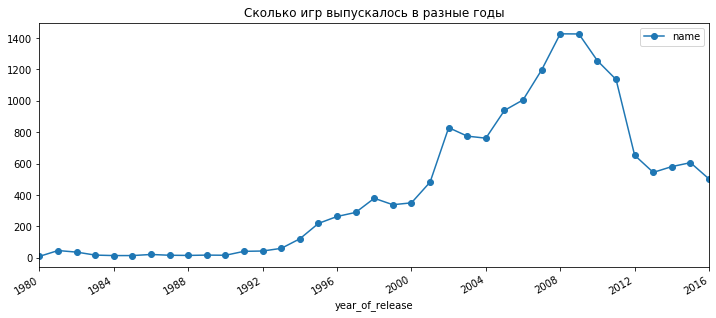

In [10]:
#Посмотриv, сколько игр выпускалось в разные годы. 
data_year_game = data.pivot_table(index='year_of_release', values='name', aggfunc='count') #посмотрим продажи по годам 
data_year_game = data_year_game.sort_values(by='name', ascending=False)
data_year_game.plot(style='o-', figsize=(12, 5), title='Сколько игр выпускалось в разные годы')
print(data_year_game.head())

Из графика "Сколько игр выпускалось в разные годы" видно что наибольшее кол-во игр было выпущено в 2008 и 2009 годах. Самое минимальное кол-во игр выпускалось с 1980 по 1994 год. C 2010 наблюдается спад продаж игр, до уровня 2001 года.

In [11]:
#Посмотрим, как менялись продажи по платформам.
data_paltform_sales = (data
                    .pivot_table(index='platform', values='sum_sales', aggfunc='sum')
                    .sort_values(by='sum_sales', ascending=False)) #найдем популярные платформы.

print(data_paltform_sales.head(15))



          sum_sales
platform           
PS2         1255.77
X360         971.42
PS3          939.65
Wii          907.51
DS           806.12
PS           730.86
GBA          317.85
PS4          314.14
PSP          294.05
PC           259.52
3DS          259.00
XB           257.74
GB           255.46
NES          251.05
N64          218.68


Получается популярные платформы:PS2, Wii, PS, DS, PS3, X360, PC, GBA, PS4, PSP

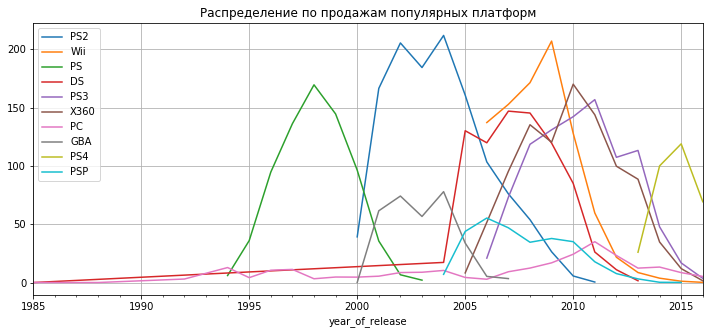

In [12]:
#построим график распределения по годам по пулярным платформам:PS2, Wii, PS, DS, PS3, X360, PC, GBA, PS4, PSP
#для PS2
(data
 .query('platform == "PS2"')
 .groupby('year_of_release')['sum_sales'].sum()
 .plot(figsize=(12, 5), grid=True)
)
#для Wii
(data
 .query('platform == "Wii"')
 .groupby('year_of_release')['sum_sales'].sum()
 .plot(figsize=(12, 5), grid=True)
)
#для PS
(data
 .query('platform == "PS"')
 .groupby('year_of_release')['sum_sales'].sum()
 .plot(figsize=(12, 5), grid=True)
)
#для DS
(data
 .query('platform == "DS"')
 .groupby('year_of_release')['sum_sales'].sum()
 .plot(figsize=(12, 5), grid=True)
)
#для PS3
(data
 .query('platform == "PS3"')
 .groupby('year_of_release')['sum_sales'].sum()
 .plot(figsize=(12, 5), grid=True)
)
#для X360
(data
 .query('platform == "X360"')
 .groupby('year_of_release')['sum_sales'].sum()
 .plot(figsize=(12, 5), grid=True)
)
#для PC
(data
 .query('platform == "PC"')
 .groupby('year_of_release')['sum_sales'].sum()
 .plot(figsize=(12, 5), grid=True)
)
#для GBA
(data
 .query('platform == "GBA"')
 .groupby('year_of_release')['sum_sales'].sum()
 .plot(figsize=(12, 5), grid=True)
)
#для PS4
(data
 .query('platform == "PS4"')
 .groupby('year_of_release')['sum_sales'].sum()
 .plot(figsize=(12, 5), grid=True)
)
#для PSP
(data
 .query('platform == "PSP"')
 .groupby('year_of_release')['sum_sales'].sum()
 .plot(figsize=(12, 5), grid=True)
)
plt.title('Распределение по продажам популярных платформ')
plt.legend(['PS2', 'Wii', 'PS', 'DS', 'PS3', 'X360', 'PC', 'GBA', 'PS4', 'PSP'])

Из графика видно, что игровые платформы живут около 10 лет. Наиболее долго сущевствующие платформы это DS и PC.Остальные платформы имуют пик продаж в среднем от года до трёх лет. Новые платформы повлялись в периуд с 2000 по 2006.

In [13]:
# Определим актуальный периуд
data_act = data.query('year_of_release > 2012')
data_act = data_act.reset_index(drop=True)
print('Количество строк в уменьшенной таблице:', len(data_act))
print('Посмотрим сколько от таблицы осталось после выбора актуального среза: {: .2%}'. format(len(data_act) / len(data)))
display(data_act.head())

Количество строк в уменьшенной таблице: 2233
Посмотрим сколько от таблицы осталось после выбора актуального среза:  13.36%


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,NaN,14.60
4,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [14]:
data_act_popular = (data_act
    .pivot_table(index='platform', values='sum_sales', aggfunc='sum')
    .sort_values(by='sum_sales', ascending=False)) #найдем популярные платформы.
print(data_act_popular.head(10))

          sum_sales
platform           
PS4          314.14
PS3          181.43
XOne         159.32
3DS          143.25
X360         136.80
WiiU          64.63
PC            39.43
PSV           32.99
Wii           13.66
PSP            3.50


Старый вывод: После определения среза видно, что список популярных платформ не изменился. 

Новый вывод: После определения среза видно, что список популярных платформ изменился. Популярные платформы с 2012 года: PS4, PS3, XOne, 3DS, X360

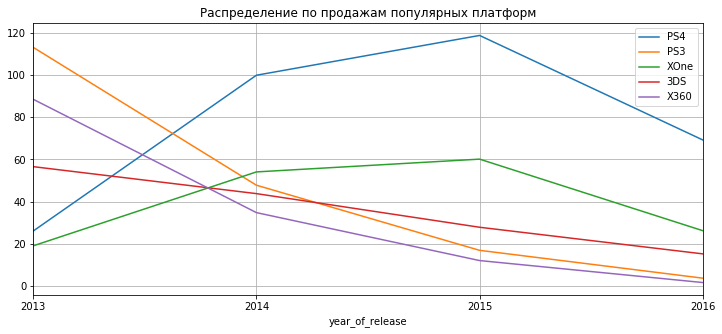

In [15]:
#построим графики для первых пяти популярных платформ
#для PS4
(data_act
 .query('platform == "PS4"')
 .groupby('year_of_release')['sum_sales'].sum()
 .plot(figsize=(12, 5), grid=True)
)

#для PS3
(data_act
 .query('platform == "PS3"')
 .groupby('year_of_release')['sum_sales'].sum()
 .plot(figsize=(12, 5), grid=True)
)

#для XOne
(data_act
 .query('platform == "XOne"')
 .groupby('year_of_release')['sum_sales'].sum()
 .plot(figsize=(12, 5), grid=True)
)
#для 3DS
(data_act
 .query('platform == "3DS"')
 .groupby('year_of_release')['sum_sales'].sum()
 .plot(figsize=(12, 5), grid=True)
)

#для X360
(data_act
 .query('platform == "X360"')
 .groupby('year_of_release')['sum_sales'].sum()
 .plot(figsize=(12, 5), grid=True)
)

plt.title('Распределение по продажам популярных платформ')
plt.legend(['PS4', 'PS3', 'XOne','3DS','X360'])

Из графиков видно, что продажи по всем платформам начиная с 2010 года снижаются. При этом для платформ 'PS2', 'DS' они совсем прекратились в 2011 и 2013 годах соответственно.

В периуд с 2010 года судя по графика повилось две новые популярные платформы PS4 и XOne. Пик их продаж пришелся на 2015 год. 

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'График продаж игр по платформам')

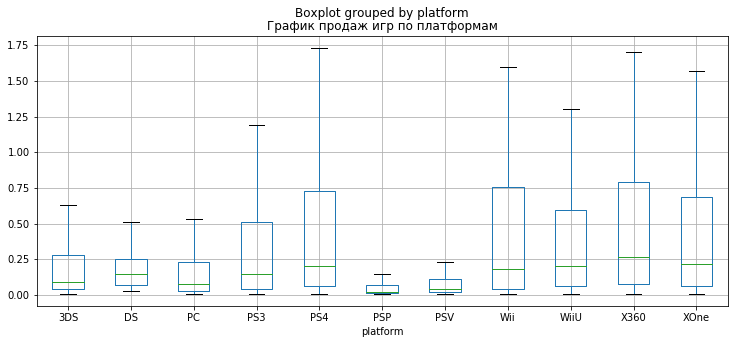

In [16]:
#Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
data_act.boxplot('sum_sales', by='platform', showfliers=False, figsize=(12, 5))
plt.title('График продаж игр по платформам')

После построениея графика видно, что выделяются следующие платформы PS3, PS4, Wii, WiiU, XOne, X360.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
2,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,NaN,14.63
4,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
9,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
10,Star Wars Battlefront (2015),PS4,2015-01-01,Shooter,2.99,3.49,0.22,1.28,0.0,0.0,NaN,7.98
11,Call of Duty: Advanced Warfare,PS4,2014-01-01,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


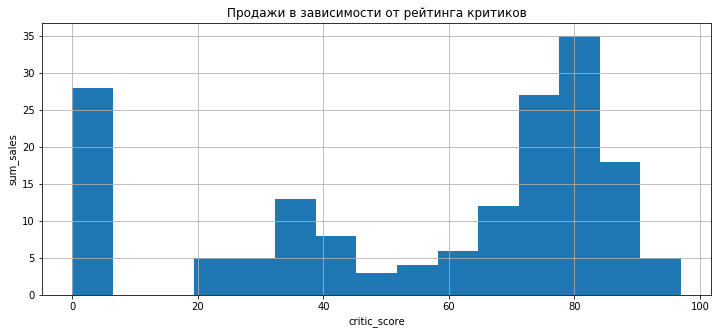

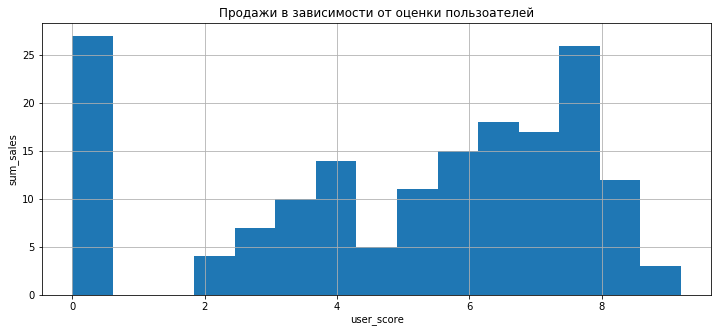

In [17]:
#Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
data_act_ps4 = data_act.query('platform == "PS4"')

data_act_ps4_cs = data_act_ps4.pivot_table(index='sum_sales', values='critic_score')
data_act_ps4_cs.hist(figsize=(12, 5), bins=15)
plt.xlabel('critic_score')
plt.ylabel('sum_sales')
plt.title('Продажи в зависимости от рейтинга критиков')

data_act_ps4_us = data_act_ps4.pivot_table(index='sum_sales', values='user_score')
data_act_ps4_us.hist(figsize=(12, 5), bins=15)
plt.xlabel('user_score')
plt.ylabel('sum_sales')
plt.title('Продажи в зависимости от оценки пользоателей')

display(data_act_ps4.head())


In [18]:
#разберемся с нулевым рейтингом, посмотрим какой процент продаж он составляет от рейтинговых продаж на платформе PS2
data_act_ps4_zero = data_act_ps4.query('critic_score == 0')

a = data_act_ps4_zero['sum_sales'].sum() #суммарные продажи для игр с нулевым рейтингом критиков на платформе PS2
b = data_act_ps4['sum_sales'].sum() # общие продажи на платформе PS2

print('Процент продаж игр с нулевым рейтингом критиков от общей продажи на платформе: {: .2%}'. format(a / b))

data_act_ps4_zero_us = data_act_ps4.query('user_score == 0')

c = data_act_ps4_zero_us['sum_sales'].sum() #суммарные продажи для игр с нулевым рейтингом пользователей на платформе PS2
print('-------------------------------------------------------------------------------------------')
print('Процент продаж игр с нулевым рейтингом пользователей от общей продажи на платформе: {: .2%}'. format(c / b))



Процент продаж игр с нулевым рейтингом критиков от общей продажи на платформе:  22.17%
-------------------------------------------------------------------------------------------
Процент продаж игр с нулевым рейтингом пользователей от общей продажи на платформе:  22.03%


In [19]:
#посчитаем корреляцию продаж взависимости от рейтинга на платформе PS2
print('Корреляция продаж от рейтинга критиков:', round(data_act_ps4['sum_sales'].corr(data_act_ps4['critic_score']), 2))
print('-------------------------------------------------')
print('Корреляция продаж от рейтинга пользователей:', round(data_act_ps4['sum_sales'].corr(data_act_ps4['user_score']), 2))



Корреляция продаж от рейтинга критиков: 0.23
-------------------------------------------------
Корреляция продаж от рейтинга пользователей: 0.11


Игры с высоким рейтингом продаются чаще,  чем с более низки рейтингом. Зависимость от рейтинга не сильная и составляет 0,23 для критиков, 0,11 для пользователей. Продажи с нулевым рейингом критиков 22,17%, пользователей 22.03%. От сюда можно сделать вывод, что рейтинг не сильно влияет на выбор покупателя. Можно предполосжить, что покупатель руководствуется еще и личным предпочтением, или другим фактором, который не освещен в данных.


Расчитаем корреляцию для платформы ['PS3']

Корреляция продаж от рейтинга критиков: 0.28
Корреляция продаж от рейтинга пользователей: 0.2
-------------------------------------------------

Расчитаем корреляцию для платформы ['XOne']

Корреляция продаж от рейтинга критиков: 0.27
Корреляция продаж от рейтинга пользователей: 0.12
-------------------------------------------------

Расчитаем корреляцию для платформы ['3DS']

Корреляция продаж от рейтинга критиков: 0.06
Корреляция продаж от рейтинга пользователей: 0.05
-------------------------------------------------

Расчитаем корреляцию для платформы ['X360']

Корреляция продаж от рейтинга критиков: 0.25
Корреляция продаж от рейтинга пользователей: 0.07
-------------------------------------------------


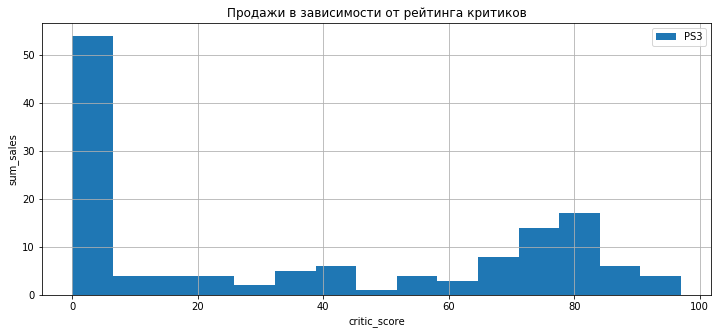

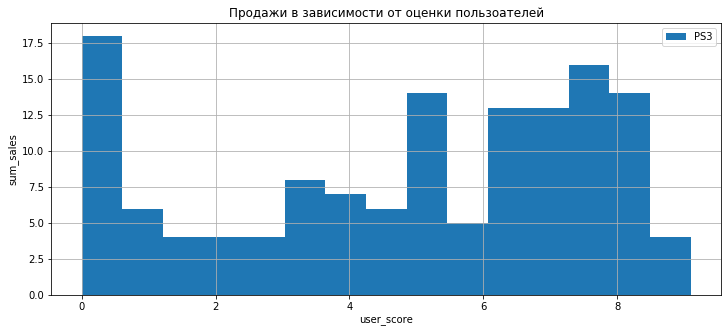

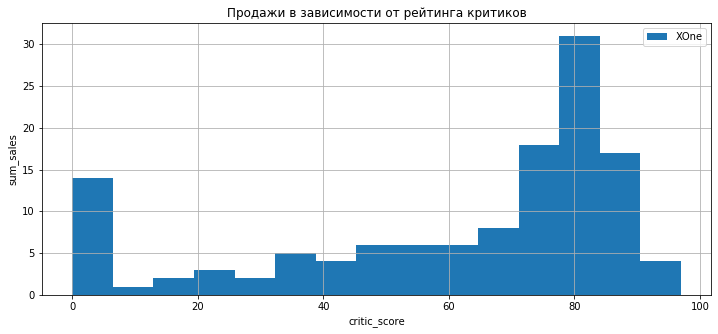

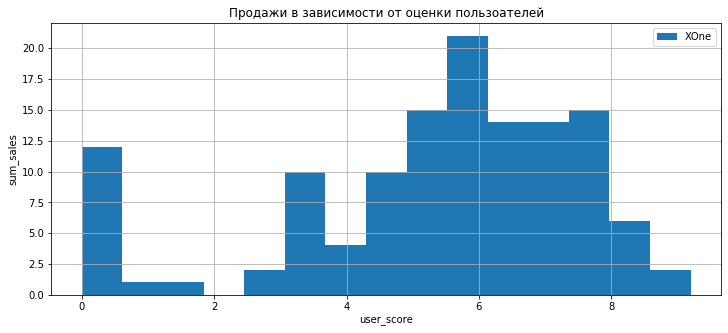

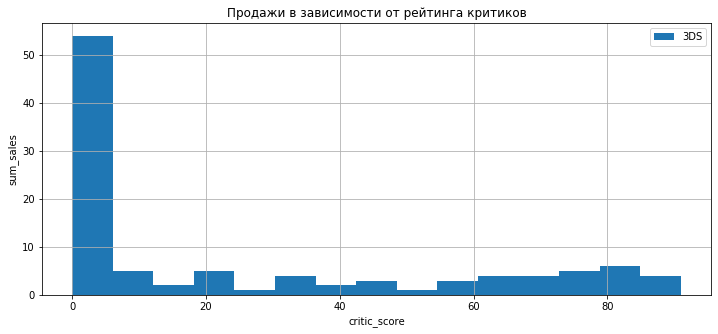

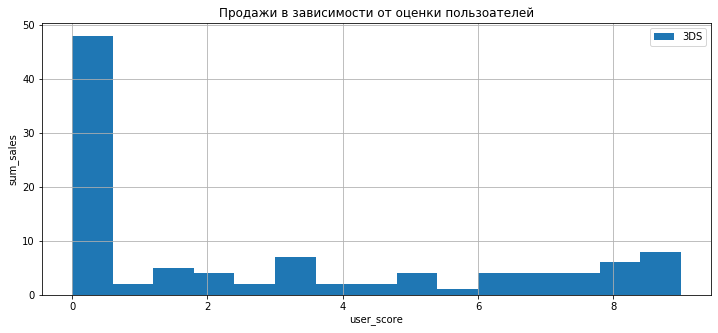

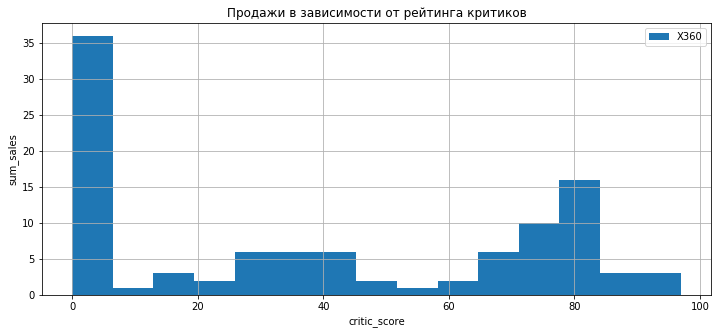

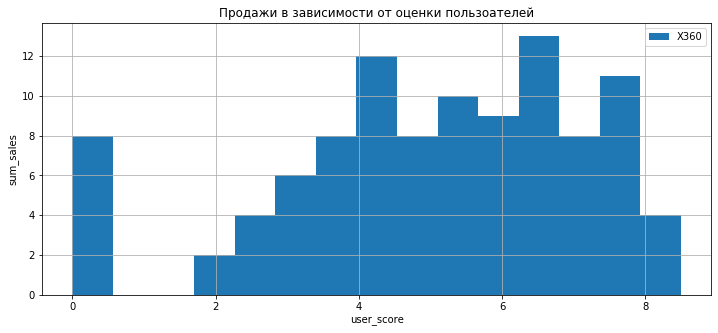

In [20]:
#Соотнесите выводы с продажами игр на других платформах:PS3, XOne,3DS,X360
for z in ['PS3', 'XOne','3DS','X360']:
    data_act_z = data_act.query('platform == @z')
    
    data_act_ps2_cs = data_act_z.pivot_table(index='sum_sales', values='critic_score')
    data_act_ps2_cs.hist(figsize=(12, 5), bins=15)
    plt.xlabel('critic_score')
    plt.ylabel('sum_sales')
    plt.legend([z])
    plt.title('Продажи в зависимости от рейтинга критиков')
    
    data_act_ps2_us = data_act_z.pivot_table(index='sum_sales', values='user_score')
    data_act_ps2_us.hist(figsize=(12, 5), bins=15)
    plt.xlabel('user_score')
    plt.ylabel('sum_sales')
    plt.legend([z])
    plt.title('Продажи в зависимости от оценки пользоателей')
    print()
    print('Расчитаем корреляцию для платформы', [z])
    print()
    print('Корреляция продаж от рейтинга критиков:', round(data_act_z['sum_sales'].corr(data_act_z['critic_score']), 2))
    print('Корреляция продаж от рейтинга пользователей:', round(data_act_z['sum_sales'].corr(data_act_z['user_score']), 2))
    print('-------------------------------------------------')



В целом на других платформах тоже самое, что и на платформе PS4. Получается, что пользователи скорее всего не смотрят рейтинг, а выбирают игру по други параметрам.

              sum_sales
genre                  
Action           321.87
Shooter          232.98
Sports           150.65
Role-Playing     145.89
Misc              62.82
Platform          42.63
Racing            39.89
Fighting          35.31
Adventure         23.64
Simulation        21.76
Strategy          10.08
Puzzle             3.17


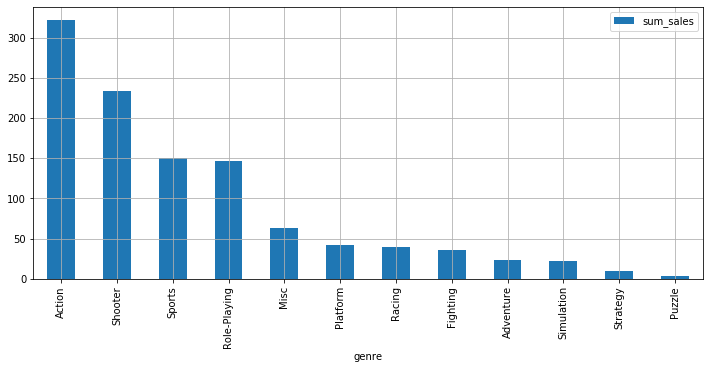

In [21]:
#Посмотрите на общее распределение игр по жанрам
data_act_genre = (data_act
                    .pivot_table(index='genre', values='sum_sales', aggfunc='sum')
                    .sort_values(by='sum_sales', ascending=False))
data_act_genre.plot(figsize=(12, 5), grid=True, kind='bar')                 
print(data_act_genre.head(13))

Самый популярный жанр это Action, не популярный Strategy и Puzzle. Это хорошо видно на графике.         

## Вывод

За весь периуд данные не важны, т.к. в периуд с 1980 по 1999 выпуск игр прктически не изменялся. На платформе PS, есть выпуск в периуд с 1994 по 2003. Т.к. в 2003 году выпуск прекратился, на платформе PS. Это связано с тем, что в 2000 году появилсаь новая платворма PS2, которая пришла на смену платформе PS. Так же общий выпуск игр был не высоки и составлял 400 млн. После 2000 года наблюдается подъем выпуска, и максимум выпуска игр зафиксирован в 2008 и 2009 годах. После которых пошел спад, и в 2014 году выпуск составил 500 млн.

После расчета суммарных продаж по всем регионам популярные платформы:PS2, Wii, PS, DS, PS3, X360, PC, GBA, PS4, PSP. Пронаблюдав историю платформы PS, PS2, PS3, PS4 можно сделать вывод, что платформы живут около 10 лет, раз в 6 лет происходит смена поколений платформ. Наиболее долго сущевствующие платформы это DS и PC. Игровые платформы имееют пик продаж от года до трех лет.

Актуальный периуд решено брать с 2012 года. Т.к. большество популярных платформ с 2000 по 2011 год уже на исходе своего существования, и как раз в последующие года после 2011 года должно быть смена поколений и популярными платформами могут быть другие. 

"Т.к. до данного года сущевсвовало всего две платформы, в 1994 году появилась платформа PS, по котрой пик продаж пришелся на 1998 год, но продажи ее закончились в 2003 году, поэту данная платформа берется только частично."

После выбора актуального периуда, популярными стали: PS3, PS4, Wii, WiiU, XOne, X360.

Рассмотренна подробна платформа PS4 из её иследования видно, что от рейтинга зависит много, но не многое т.к. продажи игр с нулевым рейтингом составляют 22% от общего числа продаж по платформе. Корреляция от рейтинга не сильная и составляет 0,23 для критиков, 0,11 для пользователей. По дргим рейтинговым платформам наблюдается аналогичный сценарий.

Популярным жанром является Action, не популярным Puzzle. 

## Шаг 4. Составьте портрет пользователя каждого региона


---------------------------------------------------
Топ-5 популярных платформ в Северной Америке

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64
---------------------------------------------------

Доля продаж в Северной Америке от общих продаж 0.4

---------------------------------------------------
Топ-5 популярных платформ в Европе

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64
---------------------------------------------------

Доля продаж в Европе от общих продаж 0.36

---------------------------------------------------
Топ-5 популярных платформ в Японии

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64
---------------------------------------------------

Доля продаж в Японии от общих продаж 0.13


-------------------------------------------------------
Графики популярности платформ н

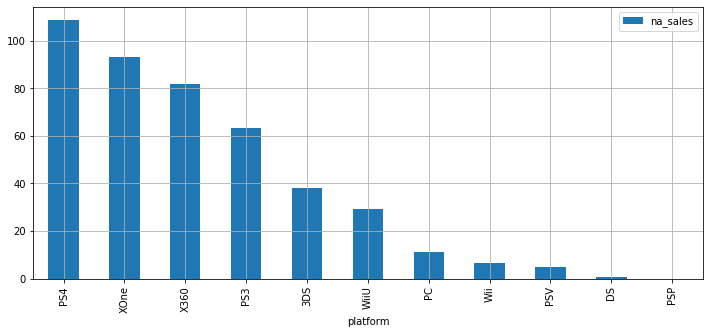

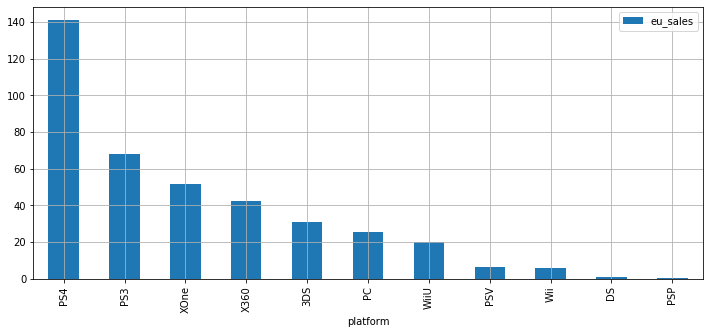

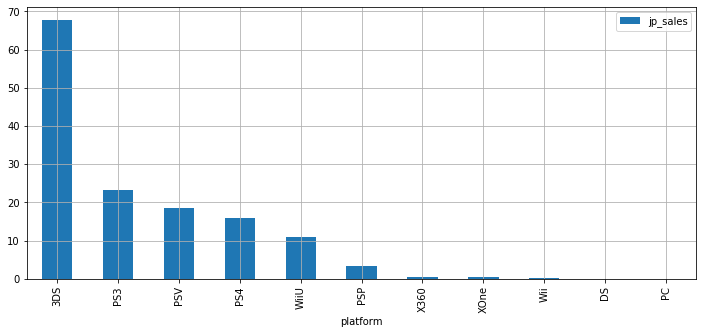

In [22]:
#Определите для пользователя каждого региона (NA, EU, JP):
#Самые популярные платформы (топ-5). Опишите различия в долях продаж.
w = ['Северной Америке', 'Европе', 'Японии']
count=0
for y in ['na_sales', 'eu_sales', 'jp_sales']:
    data_act_y = (data_act
               .groupby('platform')[y].sum()
               .sort_values(ascending=False)
              )
    sales_y = round(data_act[y].sum() / data_act['sum_sales'].sum(), 2)
    print()
    print('---------------------------------------------------')
    print('Топ-5 популярных платформ в', w[count])
    print()
    print(data_act_y.head())
    print('---------------------------------------------------')
    print()
    print('Доля продаж в', w[count], 'от общих продаж', sales_y)
    count+=1

for pp in ['na_sales', 'eu_sales', 'jp_sales']:
    data_act_pp = data_act.pivot_table(index='platform', values=pp, aggfunc='sum')
    data_act_pp = data_act_pp.sort_values(by=pp, ascending=False)
    data_act_pp.plot(figsize=(12, 5), grid=True, kind='bar')
print()
print()
print('-------------------------------------------------------')
print('Графики популярности платформ на рынках: Северной Америке, Европы, Японии соответственно')


---------------------------------------------------
Топ-5 популярных жанров в Северной Америке

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

---------------------------------------------------
Топ-5 популярных жанров в Европе

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

---------------------------------------------------
Топ-5 популярных жанров в Японии

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64


-------------------------------------------------------
Графики популярности жанров игры на рынках: Северной Америке, Европы, Японии соответственно


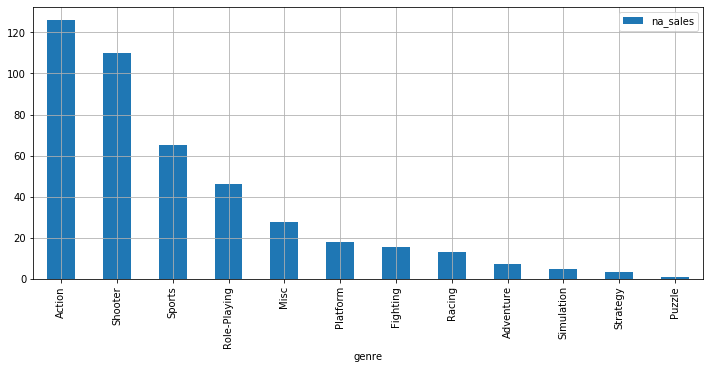

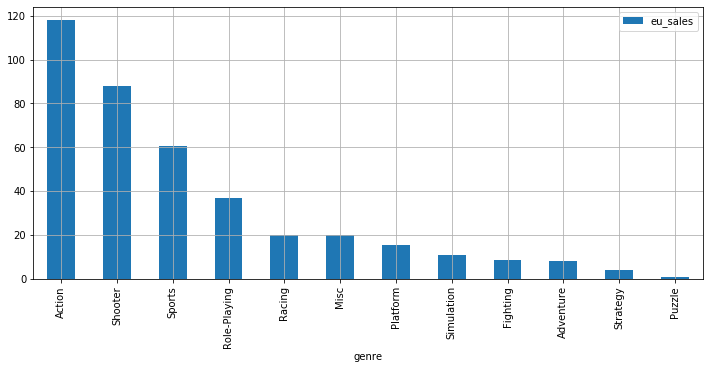

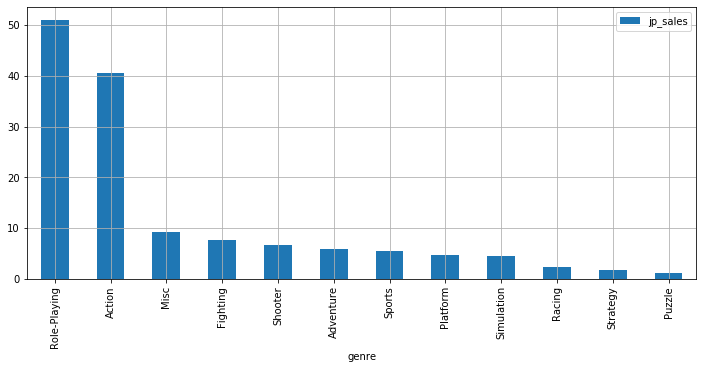

In [23]:
#Самые популярные жанры (топ-5). Поясните разницу.
w = ['Северной Америке', 'Европе', 'Японии']
count=0
for g in ['na_sales', 'eu_sales', 'jp_sales']:
    data_act_g = (data_act
               .groupby('genre')[g].sum()
               .sort_values(ascending=False)
              )
    print()
    print('---------------------------------------------------')
    print('Топ-5 популярных жанров в', w[count])
    print()
    print(data_act_g.head())
    count+=1

for pp in ['na_sales', 'eu_sales', 'jp_sales']:
    data_act_pp = data_act.pivot_table(index='genre', values=pp, aggfunc='sum')
    data_act_pp = data_act_pp.sort_values(by=pp, ascending=False)
    data_act_pp.plot(figsize=(12, 5), grid=True, kind='bar')
print()
print()
print('-------------------------------------------------------')
print('Графики популярности жанров игры на рынках: Северной Америке, Европы, Японии соответственно')


Влияние рейтинга ESRB на продажи в Северной Америке

Продано с рейтингом 348.29
Продано без рейтинга 89.42
-----------------------------------------

Влияние рейтинга ESRB на продажи в Европе

Продано с рейтингом 313.32
Продано без рейтинга 78.91
-----------------------------------------

Влияние рейтинга ESRB на продажи в Японии

Продано с рейтингом 55.73
Продано без рейтинга 85.05
-----------------------------------------


Графики влияния рейтинга на продажи игр, на рынках: Северной Америке, Европы, Японии соответственно


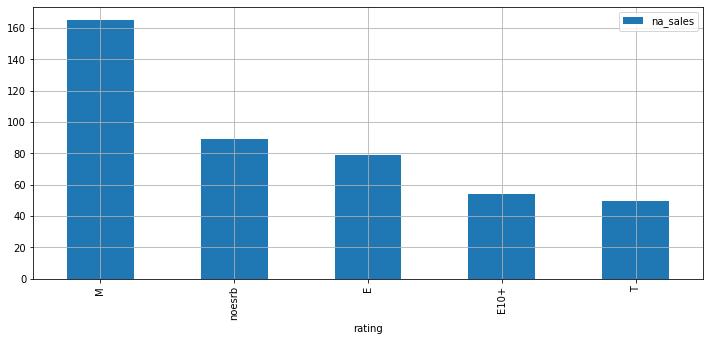

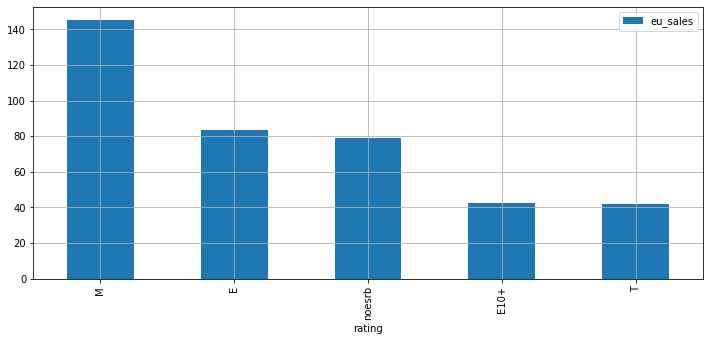

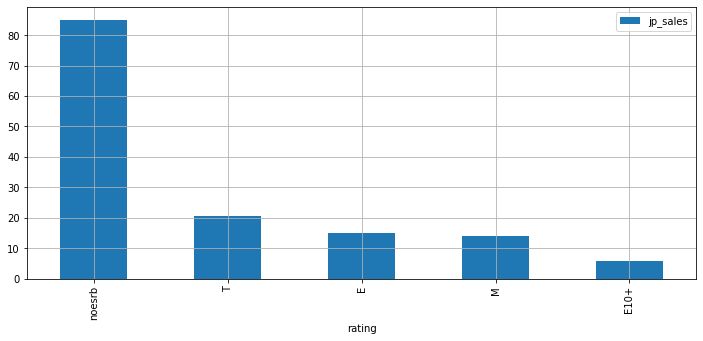

In [24]:
#Влияет ли рейтинг ESRB на продажи в отдельном регионе
data_act['rating'] = data_act['rating'].fillna('noesrb') # заменим в столбце rating пропущенные значения 
#на noesrb - нетрейтинга ESRB

w = ['Северной Америке', 'Европе', 'Японии']
count = 0

for p in ['na_sales', 'eu_sales', 'jp_sales']:
    data_act_esrb = data_act.query('rating != "noesrb"')
    data_act_esrb = round(data_act_esrb[p].sum(), 2)

    data_act_noesrb = data_act.query('rating == "noesrb"')
    data_act_noesrb = round(data_act_noesrb[p].sum(),2)
    print()
    print('Влияние рейтинга ESRB на продажи в', w[count])
    print()
    print('Продано с рейтингом', data_act_esrb)
    print('Продано без рейтинга', data_act_noesrb)
    print('-----------------------------------------')
    count += 1

for pp in ['na_sales', 'eu_sales', 'jp_sales']:
    data_act_pp = data_act.pivot_table(index='rating', values=pp, aggfunc='sum')
    data_act_pp = data_act_pp.sort_values(by=pp, ascending=False)
    data_act_pp.plot(figsize=(12, 5), grid=True, kind='bar')
print()
print()
print('Графики влияния рейтинга на продажи игр, на рынках: Северной Америке, Европы, Японии соответственно')

### Вывод

На всех трех рынках одной из наиболее поулярных платоформ является PS3 и PS4. В Северной Америке самая большая доля продаж она составляет 0,4; в Японии наоборот доля продаж самая маленькая 0,13. Европа с 0,36 расположилась между Японией и Северной Америкой.

На всех трех рынках одним из популярных жанров является Action. Самые популярные жанры в Европе и Северной Америке одинаковые. На рынке Японии жанры Sports и Shooter не популярны, там популярны два других жанра Role-Playing и Misc. Думаю это связано с осбенности культуры Японии.

Рейтинг ESRB значительно влияет на продажи только в Северной Америке и Европе, разница очень ощутимая. В Японии разницы практически нет, без рейтинга даже продажи выше, поэтому рейтинг ESRB не влияет на продажи в Японии. Думаю это связано в особенностях законадательства Европы, Северной Америки и Японии.

## Шаг 5. Проверьте гипотезы

Дисперсия для значений платформы XOne: 1.9069968429360695
Дисперсия для значений платформы PC: 3.035892752408882


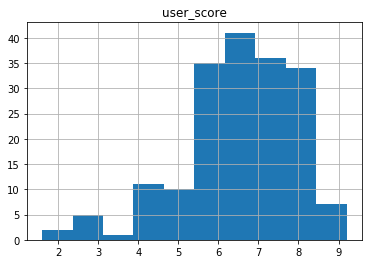

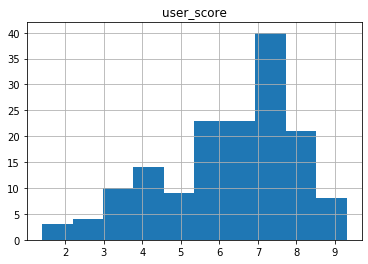

In [25]:
data_act_xone = data_act.query('platform == "XOne" and user_score != 0') #Сделаем срез для платформы и не возмем 
#в расчет нулевые значения
data_act_pc = data_act.query('platform == "PC"and user_score != 0') #Сделаем срез для платформы и не возмем 
#в расчет нулевые значения

data_act_xone.hist('user_score')
print('Дисперсия для значений платформы XOne:', np.var(data_act_xone['user_score'], ddof=1))

data_act_pc.hist('user_score')
print('Дисперсия для значений платформы PC:', np.var(data_act_pc['user_score'], ddof=1))

В данном работе мы используем статистический критерий Стьюдента, потому данные у нас количественные, подчиняются закону нормального распределения, являются независимыми. Дисперсии не равны.

In [26]:
#Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
alpha = 0.05 #уровень значимости

Сформулируем гипотезы для проверки.

Н0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н1 - Средние пользовательские рейтинги платформ Xbox One и PC разные

In [27]:
resault = st.ttest_ind(data_act_xone['user_score'], data_act_pc['user_score'], equal_var=False)

print('p-значение', resault.pvalue)

if (resault.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Дисперсия для значений жанра Action: 1.7693609042482705
Дисперсия для значений жанра Sports: 3.180612814465409


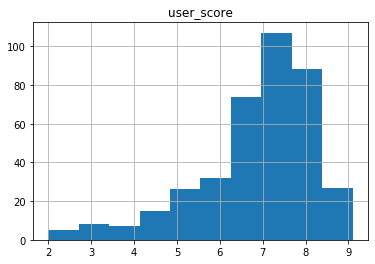

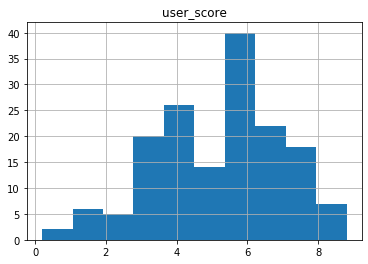

In [28]:
data_act_action = data_act.query('genre == "Action" and user_score != 0') #Сделаем срез для платформы и не возмем 
#в расчет нулевые значения
data_act_sport = data_act.query('genre == "Sports" and user_score != 0')#Сделаем срез для платформы и не возмем 
#в расчет нулевые значения

data_act_action.hist('user_score')
print('Дисперсия для значений жанра Action:', np.var(data_act_action['user_score'], ddof=1))

data_act_sport.hist('user_score')
print('Дисперсия для значений жанра Sports:', np.var(data_act_sport['user_score'], ddof=1))

In [29]:
#Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) 
#и Sports (англ. «спортивные соревнования») разные.

Сформулирую гипотезы для проверки.

H0 - Средние пользовательские рейтинги одинаковые

Н1 - Средние пользовательские рейтинги разные 

In [30]:
resalts = st.ttest_ind(data_act_action['user_score'], data_act_sport['user_score'], equal_var=False)

print('p-значение', resalts.pvalue)

if (resalts.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 1.4460039700704315e-20
Отвергаем нулевую гипотезу


### Вывод

При проверки гепотез получилось, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Средние пользовательские рейтинги жанров Action и Sports разные.

## Шаг 6. Напишите общий вывод

   Из графика выпуска игр видно, что максимум выпуска игр был в 2008 и 2009 годах.  После 2009 наблюдается спад выпуска игр, в 2015 до объемов  2003 года.
   Из графика распределение по продажам популярных платформ,  видно что продажи всех популярных платформ к 2016 году стремятся к нулю

   Все это может говорить о следующем,  что продажи игр переходят в интернет, где её можно сразу и скачать, игры перестают быть офлайновыми и становятся онлайновыми. Также должна произойти смена поколений игровых платформ , т.к.  всем популярные платформы  были выпущены в районе 2006 года. А срок использования платформ судя по графику 10 лет.
   
Игры с высоким рейтингом продаются чаще. При этом рейтинг для продажи не является определяющим.
Популярные жанры игр Action, Sports, Shooter . Для Японии популярные жанры немного другие: Role-Playing и Misc и Action.

 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Средние пользовательские рейтинги жанров Action и Sports разные.